In [118]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [131]:
import loaddata as ld
import pandas as pd
reload(ld)
metacritic_df,movies_df = ld.load_data()
full_df = pd.merge(movies_df, metacritic_df, how='inner', on=['title', 'year'], sort=True)
print len(full_df) 
print len(metacritic_df) 
print len(movies_df) 
# metacritic_df.to_excel('C:\Users\RPM592\Documents\Training\Python\metacritic.xlsx')
# movies_df.to_excel('C:\Users\RPM592\Documents\Training\Python\movies.xlsx')

2381
4765
3728


In [132]:

metacritic_df['title_nopunc'] = metacritic_df['title'].str.replace('The','')
movies_df['title_nopunc'] = movies_df['title'].str.replace('The','')

metacritic_df['title_nopunc'] = metacritic_df['title'].str.replace('[^\w\s]','')
movies_df['title_nopunc'] = movies_df['title'].str.replace('[^\w\s]','')
movies_df['title_nopunc'] = movies_df['title_nopunc'].str.lower()
metacritic_df['title_nopunc'] = metacritic_df['title_nopunc'].str.lower()

full_df = pd.merge(movies_df, metacritic_df, how='inner', on=['title_nopunc', 'year'], sort=True)
print len(full_df) 
print len(metacritic_df) 
print len(movies_df) 

2454
4765
3728


In [ ]:
#full_df['user_score'] = full_df['user_score'].astype(str)
#full_df['user_score'] = full_df['user_score'].str.replace('tbd',np.NaN)
#full_df['user_score'] = full_df['user_score'].str.replace('NA',np.NaN)

full_df = full_df[full_df.user_score.astype(str)<>'tbd']

full_df['user_score'] = full_df['user_score'].astype(float)
full_df.user_score.value_counts()[0:8]

In [181]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369 entries, 0 to 2453
Data columns (total 29 columns):
alt_title               2369 non-null object
director_x              1554 non-null object
domestic_gross          2352 non-null float64
mojo_slug               2369 non-null object
opening_per_theater     2327 non-null float64
opening_weekend_take    2327 non-null float64
production_budget       1201 non-null float64
release_date_limited    207 non-null object
release_date_wide       2366 non-null object
title_x                 2369 non-null object
widest_release          2335 non-null float64
worldwide_gross         2086 non-null float64
year                    2369 non-null float64
title_nopunc            2369 non-null object
complete                2369 non-null object
director_y              2369 non-null object
genre                   2369 non-null object
metacritic_page         2369 non-null object
metascore               2344 non-null float64
num_critic_reviews      2369 no

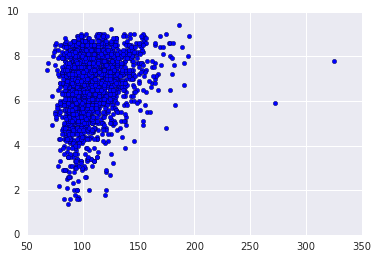

In [165]:
plt.scatter(full_df.runtime_minutes, full_df.user_score.astype(float))
# full_df[full_df.user_score <> "tbd"].runtime_minutes
seaborn.despine()



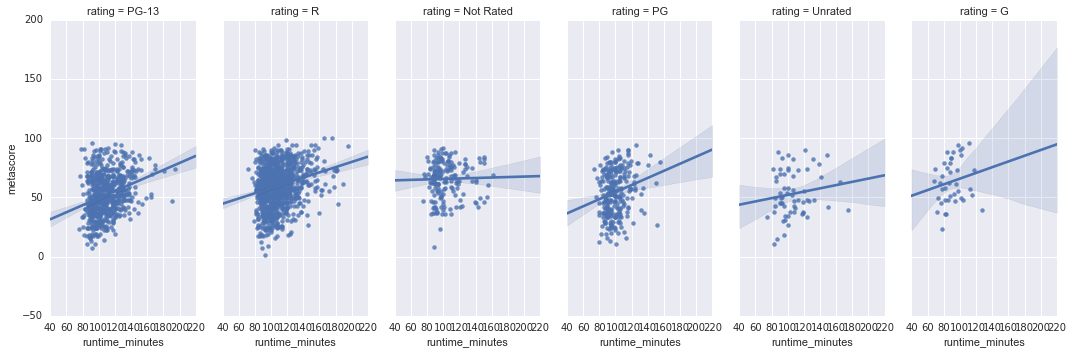

In [178]:
# print full_df.rating.value_counts()
N = 6
top_ratings = full_df.rating.value_counts().index[:N]
top_rating_movies = full_df[full_df['rating'].isin(top_ratings)]
top_rating_movies = top_rating_movies[top_rating_movies.runtime_minutes <= 200]

seaborn.lmplot(x="runtime_minutes", y="metascore", data=top_rating_movies, logx=False, col="rating",
                          aspect=.5, robust=True)

0 2227


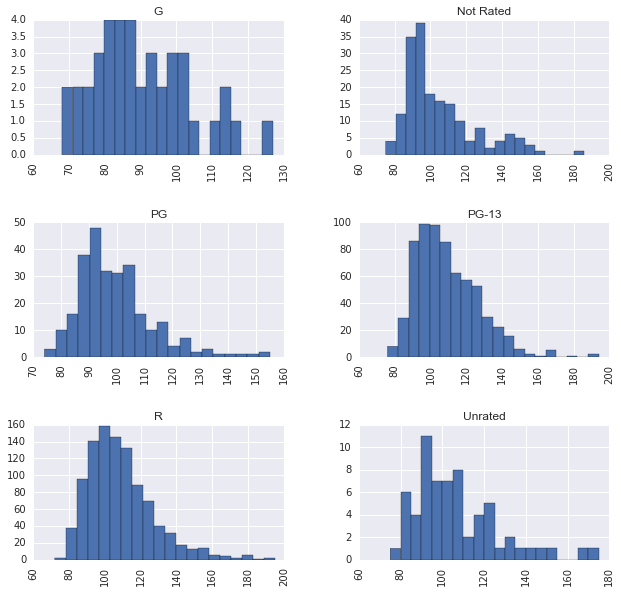

In [174]:
ax = top_rating_movies.runtime_minutes.hist(bins=20, by=top_rating_movies.rating, figsize=(10,10))
print top_rating_movies.runtime_minutes.isnull().sum(), len(top_rating_movies[top_rating_movies.runtime_minutes > 0])

In [177]:
top_rating_movies.corr(method='pearson')

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year,metascore,num_user_ratings,runtime_minutes,user_score
domestic_gross,1.000000,0.209595,0.854414,0.521314,0.640383,0.936929,-0.310889,0.070187,0.558230,0.258948,0.112204
opening_per_theater,0.209595,1.000000,0.203616,0.191435,-0.074076,0.199759,-0.025899,0.300983,0.194417,0.100843,0.174581
opening_weekend_take,0.854414,0.203616,1.000000,0.617596,0.736331,0.782113,-0.132607,-0.080424,0.541669,0.182915,-0.036595
production_budget,0.521314,0.191435,0.617596,1.000000,0.597827,0.603222,0.033150,-0.036183,0.325443,0.268113,-0.051051
widest_release,0.640383,-0.074076,0.736331,0.597827,1.000000,0.546510,-0.201440,-0.309131,0.360057,0.112508,-0.191962
worldwide_gross,0.936929,0.199759,0.782113,0.603222,0.546510,1.000000,-0.253660,0.098055,0.576529,0.269897,0.116095
year,-0.310889,-0.025899,-0.132607,0.033150,-0.201440,-0.253660,1.000000,-0.089223,-0.019948,-0.178734,-0.250310
metascore,0.070187,0.300983,-0.080424,-0.036183,-0.309131,0.098055,-0.089223,1.000000,0.237706,0.207500,0.639878
num_user_ratings,0.558230,0.194417,0.541669,0.325443,0.360057,0.576529,-0.019948,0.237706,1.000000,0.296198,0.191542
runtime_minutes,0.258948,0.100843,0.182915,0.268113,0.112508,0.269897,-0.178734,0.207500,0.296198,1.000000,0.253032


In [350]:
df = full_df
s = df.apply(lambda x: pd.Series(x['genre']),axis=1).stack().reset_index(level=1, drop=True)

lst = []
for x in df.index:
    # print x, len(df.ix[x].genre)
    if len(df.ix[x].genre) > 1:
       lst.append(df.ix[x].genre[0]) 
    else:
        lst.append(str(df.ix[x].genre))

#t = [s.ix[x].iloc[0] for x in df.index]
#print t
s.name = 'genre'
df['genre1'] = lst
df.genre1 = df.genre1.astype(str)
df.genre1 = df.genre1.str.strip('[]')
df.genre1 = df.genre1.str.replace('[\'u]','')
df.genre1 = df.genre1.str.replace('[\']','')
# df[['genre', 'genre1']]
df.genre1.value_counts()[0:6]

Drama        944
Action       452
Comedy       289
Adventre     161
Biography    115
Thriller     110
Name: genre1, dtype: int64

In [325]:
lst = []
for x in full_df.index:
    if len(full_df.ix[x].genre) > 1:
       lst.append(full_df.ix[x].genre[0]) 
    else:
        lst.append(str(full_df.ix[x].genre))
full_df['genre1'] = lst
full_df.genre1 = full_df.genre1.astype(str)
full_df.genre1 = full_df.genre1.str.strip('[]')
full_df.genre1 = full_df.genre1.str.replace('[\'u]','')
full_df.genre1 = full_df.genre1.str.replace('[\']','')

full_df[['genre', 'genre1']][0:4]

,genre,genre1
0,"[Comedy, Romance]",Comedy
1,"[Drama, Comedy, Romance]",Drama
2,"[Adventure, Drama, Fantasy]",Adventre
3,"[Action, Thriller, Crime]",Action


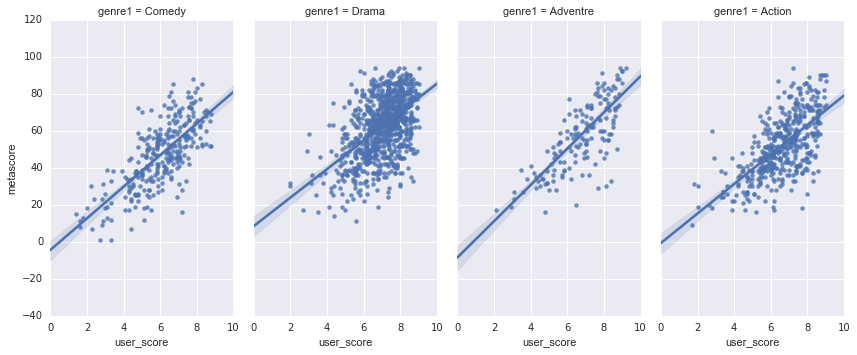

In [349]:
# print full_df.genre.value_counts()
N = 4
top_genres = full_df.genre1.value_counts().index[:N]
top_genre_movies = full_df[full_df['genre1'].isin(top_genres)]
top_genre_movies = top_genre_movies[top_genre_movies.metascore <= 95]
#top_genre_movies = top_genre_movies[top_genre_movies.domestic_gross <= (1e09*0.3)]

seaborn.lmplot(x="user_score", y="metascore", data=top_genre_movies, logx=False, col="genre1",
                          aspect=0.6, robust=True )

26 1803


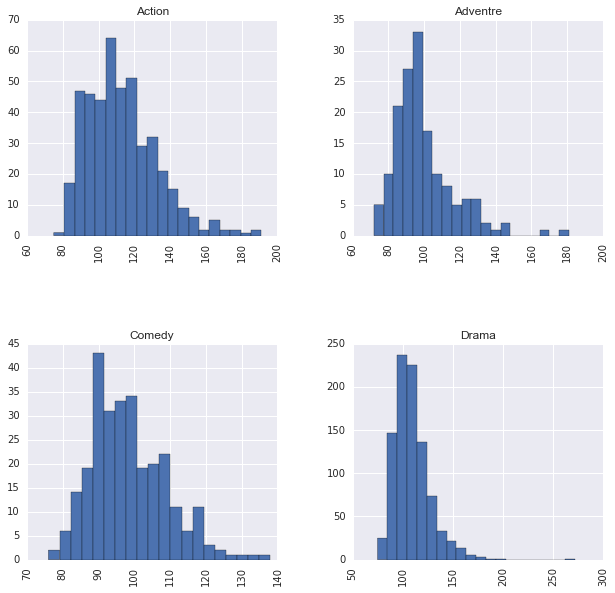

In [353]:
ax = top_genre_movies.runtime_minutes.hist(bins=20, by=top_genre_movies.genre1, figsize=(10,10))
print top_genre_movies.runtime_minutes.isnull().sum(), len(top_genre_movies[top_genre_movies.runtime_minutes > 0])